In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as soup

In [2]:
alpha_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [3]:
final_data = pd.DataFrame()

In [4]:
for a in alpha_list :
    header = {'Origin': 'https://www.1mg.com',
    'Referer': 'https://www.1mg.com/drugs-all-medicines?label={}'.format(a),
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'
    }
    
    html = requests.get('https://www.1mg.com/drugs-all-medicines?label={}'.format(a), headers=header)
    soup_obj = soup(html.content, 'lxml')
    
    product_info = []
    for name in soup_obj.findAll('div',class_ = 'style__font-bold___1k9Dl style__font-14px___YZZrf style__flex-row___2AKyf style__space-between___2mbvn style__padding-bottom-5px___2NrDR'):
        product_info.append(name.text.strip())
        
    product_name = []
    product_price = []
    for item in product_info :
        item_info = item.split('MRP₹')
        name, price = item_info[0], item_info[1]
        product_name.append(name)
        product_price.append(price)
        
    product_info_2 = []
    for name in soup_obj.findAll('div',class_ = 'style__flex-column___1zNVy style__font-12px___2ru_e'):
        for childname in name.find_all('div'):
            product_info_2.append(childname.text.strip())
    quantity = []
    company_name = []
    for i in range(0, len(product_info_2)) :
        if i%2 == 0 :
            quantity.append(product_info_2[i])
        else :
            company_name.append(product_info_2[i])
            
    diction = {'Name' : product_name, 'Price' : product_price, 'Quantity' : quantity, 'Manufacturer' : company_name}
    
    data = pd.DataFrame(diction)
    final_data = final_data.append(data, ignore_index = True)

In [5]:
final_data

,Name,Price,Quantity,Manufacturer
0,Augmentin 625 Duo Tablet,201.71,strip of 10 tablets,Glaxo SmithKline Pharmaceuticals Ltd
1,Ascoril LS Syrup,114,bottle of 100 ml Syrup,Glenmark Pharmaceuticals Ltd
2,Azithral 500 Tablet,119.5,strip of 5 tablets,Alembic Pharmaceuticals Ltd
3,Allegra 120mg Tablet,203.46,strip of 10 tablets,Sanofi India Ltd
4,Aciloc 150 Tablet,40.94,strip of 30 tablets,Cadila Pharmaceuticals Ltd
...,...,...,...,...
775,Zofer MD 4 Tablet,52.61,strip of 10 tablet dt,Sun Pharmaceutical Industries Ltd
776,Zostum 1.5gm Injection,376.2,vial of 1.5 gm Injection,Zuventus Healthcare Ltd
777,Zytee Dental Gel,113,packet of 10 ml Dental Gel,Raptakos Brett & Co Ltd
778,Zocef-CV 500 Tablet,570,strip of 6 tablets,Alkem Laboratories Ltd


In [6]:
final_data.drop_duplicates(subset = ['Name'], inplace=True)

In [7]:
final_data.shape

(763, 4)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Manufacturers with most products')

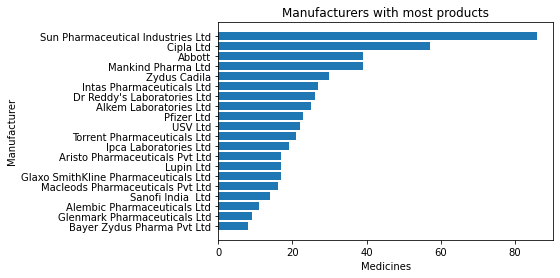

In [9]:
company_groups = final_data.groupby('Manufacturer')['Name'].count().sort_values()[-20:]

plt.barh(company_groups.keys(), company_groups)
plt.ylabel('Manufacturer')
plt.xlabel('Medicines')
plt.title('Manufacturers with most products')

In [10]:
final_data.to_csv('medicines_first_page_data.csv', index=False)

C:\Users\aryac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aryac\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


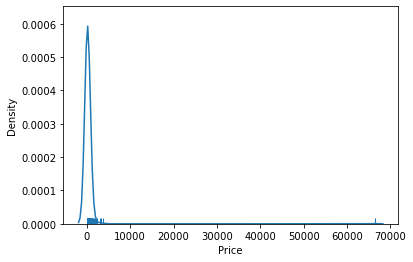

In [11]:
sns.distplot(final_data['Price'], hist=False, rug=True)
plt.show()

In [12]:
final_data = final_data.astype({'Price' : float})

In [13]:
# removing outliers

q1 = final_data['Price'].quantile(0.25)
q3 = final_data['Price'].quantile(0.75)
iqr = q3 - q1

filter = (final_data['Price'] >= q1-1.5*iqr) & (final_data['Price'] <= q3+1.5*iqr)
filtered_data = final_data[filter]

In [14]:
print(np.median(filtered_data['Price']))

109.605


C:\Users\aryac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

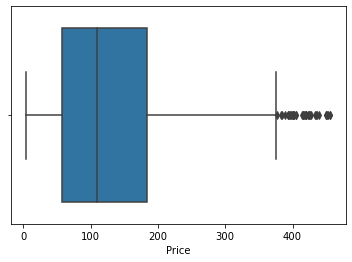

In [15]:
sns.boxplot(filtered_data['Price'])

C:\Users\aryac\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aryac\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


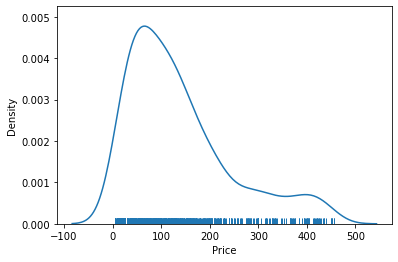

In [16]:
sns.distplot(filtered_data['Price'], hist=False, rug=True)
plt.show()